<a href="https://colab.research.google.com/github/cantaruttim/Finances/blob/main/Simula%C3%A7%C3%B5es_Monte_Carlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python para finanças - simulação Monte Carlos para previsão de preços de ações

## Importação das bibliotecas e preparação da base de dados

In [1]:
!git clone https://github.com/cantaruttim/Deltalake

Cloning into 'Deltalake'...
remote: Enumerating objects: 38, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 38 (delta 16), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (38/38), 339.16 KiB | 3.65 MiB/s, done.
Resolving deltas: 100% (16/16), done.


In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
from scipy import stats

In [3]:
dataset = pd.read_csv('/content/Deltalake/data/acoes (1).csv')
dataset

,Date,Banco Bradesco,Itau Unibanco,Banco Santander,BOVA
0,2019-01-02,8.841667,8.004946,4.51,87.900002
1,2019-01-03,8.950000,8.112119,4.55,88.000000
2,2019-01-04,9.066667,8.219291,4.72,88.500000
3,2019-01-07,9.041667,8.145095,4.78,88.480003
4,2019-01-08,9.191667,8.293487,4.81,88.830002
...,...,...,...,...,...
1119,2023-08-31,2.990000,5.500000,3.87,112.309998
1120,2023-09-01,3.020000,5.580000,3.75,114.050003
1121,2023-09-05,2.920000,5.390000,3.70,113.620003
1122,2023-09-06,2.860000,5.330000,3.61,112.250000


In [4]:
figura = px.line(title = 'Histórico do preço das ações')
for i in dataset.columns[1:]:
  figura.add_scatter(x = dataset['Date'], y = dataset[i], name = i)
figura.show()

In [5]:
dataset = pd.DataFrame(dataset['BOVA'])
dataset

,BOVA
0,87.900002
1,88.000000
2,88.500000
3,88.480003
4,88.830002
...,...
1119,112.309998
1120,114.050003
1121,113.620003
1122,112.250000


In [6]:
dataset_normalizado = dataset.copy()
for i in dataset:
  dataset_normalizado[i] = dataset[i] / dataset[i][0]
dataset_normalizado

,BOVA
0,1.000000
1,1.001138
2,1.006826
3,1.006598
4,1.010580
...,...
1119,1.277702
1120,1.297497
1121,1.292605
1122,1.277019


In [7]:
dataset_taxa_retorno = np.log(1 + dataset_normalizado.pct_change())
dataset_taxa_retorno

,BOVA
0,NaN
1,0.001137
2,0.005666
3,-0.000226
4,0.003948
...,...
1119,-0.014058
1120,0.015374
1121,-0.003777
1122,-0.012131


In [8]:
dataset_taxa_retorno.fillna(0, inplace=True)
dataset_taxa_retorno.head()

,BOVA
0,0.000000
1,0.001137
2,0.005666
3,-0.000226
4,0.003948


## Cálculo do drift

In [9]:
media = dataset_taxa_retorno.mean() # média diária (246 -- anual)
media

BOVA    0.000213
dtype: float64

In [10]:
variancia = dataset_taxa_retorno.var()
variancia

BOVA    0.000307
dtype: float64

In [11]:
drift = media - (0.5 * variancia) # 0.5 == fator aleatório
drift

BOVA    0.00006
dtype: float64

## Cálculo dos retornos diários

In [12]:
dias_frente = 50
simulacoes = 10

In [13]:
desvio_padrao = dataset_taxa_retorno.std()
desvio_padrao

BOVA    0.017518
dtype: float64

In [14]:
Z = stats.norm.ppf(np.random.rand(dias_frente, simulacoes))

In [15]:
Z.shape

(50, 10)

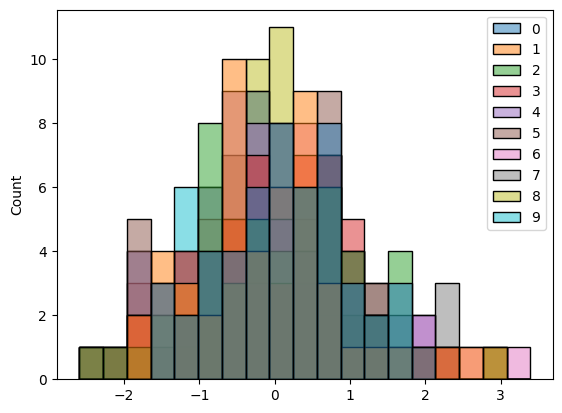

In [16]:
sns.histplot(Z);

In [17]:
Z

array([[-1.47428796e+00, -1.77752592e+00,  1.04538178e+00,
         1.12934812e+00,  7.19418413e-01,  5.39783291e-01,
        -9.74531662e-02, -8.34033826e-01, -3.43073678e-02,
        -1.46350944e+00],
       [-9.97419186e-01, -1.12264402e+00, -2.05691466e+00,
         6.18127874e-01, -5.08417041e-01, -2.26138700e+00,
        -7.72760199e-01, -3.64656788e-02, -2.28370446e-01,
        -1.49525515e-01],
       [-8.35321938e-01,  9.48235951e-02, -2.33278656e+00,
        -1.93039200e-01,  5.77841163e-02,  7.46468575e-01,
        -3.73915992e-02, -2.29912942e-01, -3.70996194e-01,
        -1.02016126e+00],
       [ 1.24869437e+00, -1.36911640e+00, -1.72002905e+00,
         6.87271670e-01, -3.32128020e-01,  1.60741789e-01,
        -4.04906546e-01, -1.95590469e+00,  5.97792617e-01,
        -7.04247146e-01],
       [-3.72358734e-01, -1.70796795e+00, -1.23241736e+00,
        -4.60768972e-01,  4.46019960e-01, -9.49467798e-01,
         7.20355803e-02,  4.46745131e-01, -9.24026531e-01,
        -2.

In [18]:
retornos_diarios = np.exp(drift.values + desvio_padrao.values * Z)

In [19]:
retornos_diarios.shape

(50, 10)

In [20]:
retornos_diarios

array([[0.97456212, 0.96939882, 1.01854268, 1.02004199, 1.01274311,
        1.00956115, 0.9983539 , 0.98555439, 0.99945889, 0.97474616],
       [0.98273756, 0.98058409, 0.96466582, 1.01094767, 0.99119225,
        0.9612166 , 0.98661285, 0.9994211 , 0.99606687, 0.99744361],
       [0.98553215, 1.00172235, 0.96001507, 0.99668357, 1.00107258,
        1.01322313, 0.99940489, 0.99603996, 0.99358127, 0.98234612],
       [1.02217685, 0.97635932, 0.97037573, 1.01217294, 0.99425803,
        1.00287977, 0.99299122, 0.96637431, 1.0105876 , 0.98779771],
       [0.99355756, 0.97058078, 0.97870022, 0.99201995, 1.00790425,
        0.98356343, 1.00132254, 1.00791705, 0.98400188, 0.95743419],
       [0.98614156, 1.05188083, 0.9756511 , 1.0267431 , 1.01273338,
        0.98718352, 1.00691908, 1.01405372, 0.95563608, 0.9672179 ],
       [1.01425387, 0.99326143, 0.98348797, 1.01143988, 0.9888017 ,
        0.99013624, 0.99594295, 0.97455797, 1.00507876, 1.03974187],
       [0.99054802, 1.00776902, 1.0113940

## Previsões de preços futuros

In [21]:
previsoes = np.zeros_like(retornos_diarios)

In [22]:
previsoes.shape

(50, 10)

In [23]:
previsoes

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 

In [24]:
previsoes[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [25]:
dataset.tail(1)

,BOVA
1123,111.699997


In [26]:
dataset.iloc[-1]

BOVA    111.699997
Name: 1123, dtype: float64

In [27]:
previsoes[0] = dataset.iloc[-1]
previsoes

array([[111.69999695, 111.69999695, 111.69999695, 111.69999695,
        111.69999695, 111.69999695, 111.69999695, 111.69999695,
        111.69999695, 111.69999695],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  

In [28]:
for dia in range(1, dias_frente):
  #print(dia)
  previsoes[dia] = previsoes[dia - 1] * retornos_diarios[dia]

In [29]:
previsoes.shape

(50, 10)

In [30]:
92.41000366 * 1.00854274

93.19943829466642

In [31]:
93.19943859 * 0.98145488

91.47104381741582

In [32]:
previsoes

array([[111.69999695, 111.69999695, 111.69999695, 111.69999695,
        111.69999695, 111.69999695, 111.69999695, 111.69999695,
        111.69999695, 111.69999695],
       [109.77178293, 109.53124012, 107.75316924, 112.92285166,
        110.71617096, 107.36789096, 110.20465234, 111.63533354,
        111.26066681, 111.41444789],
       [108.18362126, 109.71989154, 103.44466657, 112.54835067,
        110.83492334, 108.78763036, 110.13906808, 111.19325307,
        110.54651495, 109.44755074],
       [110.58279295, 107.12603864, 100.38019354, 113.9183952 ,
        110.19851254, 109.10091399, 109.36712709, 107.45430351,
        111.7169371 , 108.11204035],
       [109.87036963, 103.97447387,  98.24211739, 113.00932014,
        111.06954869, 107.30766902, 109.51176967, 108.30502461,
        109.92967656, 103.51016374],
       [108.34773793, 109.3687557 ,  95.85003007, 116.03153938,
        112.48383903, 105.9323619 , 110.26949088, 109.82711352,
        105.0527654 , 100.11688288],
       [10

## Gráfico das previsões

In [33]:
len(previsoes)

50

In [34]:
previsoes.T.shape, previsoes.shape

((10, 50), (50, 10))

In [35]:
# Matriz Transposta (linhas = colunas, colunas = linhas)
# cada linha representa um dia

previsoes.T

array([[111.69999695, 109.77178293, 108.18362126, 110.58279295,
        109.87036963, 108.34773793, 109.89211258, 108.85341441,
        109.19165375, 107.27601868, 110.37961244, 110.9979466 ,
        108.78573444, 109.54984795, 109.61573807, 111.62897   ,
        111.3503193 , 111.78652221, 113.46241821, 112.85662963,
        111.54195838, 108.59711947, 110.05363334, 110.93511416,
        111.23657244, 114.55728682, 117.79680555, 119.2417731 ,
        120.27481343, 119.89163603, 119.99469922, 120.83945076,
        123.65100122, 125.19529993, 124.95931594, 121.7509656 ,
        121.23363986, 121.58365858, 120.5555064 , 122.37908439,
        124.62664695, 121.89189412, 123.86793533, 123.03710824,
        127.31680211, 127.45706778, 128.00160142, 129.90984724,
        131.81870829, 132.73538243],
       [111.69999695, 109.53124012, 109.71989154, 107.12603864,
        103.97447387, 109.3687557 , 108.63176655, 109.4757284 ,
        108.61663787, 107.46016967, 107.78228527, 105.65160585,
   

In [36]:
figura = px.line(title = 'Previsões do preço das ações - simulações')
for i in range(len(previsoes.T)):
  figura.add_scatter(y = previsoes.T[i], name = i)
  figura.update_layout(hovermode="x")
figura.show()

## Comparação das previsões com os preços reais

In [37]:
!pip install -q yfinance

In [38]:
import yfinance as yf

In [39]:
#from pandas_datareader import data
#dataset_bova = data.DataReader(name = 'BOVA11.SA', data_source='yahoo', start='2020-11-04')['Close']
dataset_bova = gol_df = yf.download("BOVA11.SA", start='2020-11-04',end='2020-12-13')['Close']
dataset_bova

[*********************100%%**********************]  1 of 1 completed


Date
2020-11-04     94.160004
2020-11-05     96.949997
2020-11-06     97.190002
2020-11-09     99.500000
2020-11-10    101.000000
2020-11-11    100.889999
2020-11-12     98.699997
2020-11-13    100.830002
2020-11-16    102.510002
2020-11-17    103.099998
2020-11-18    101.919998
2020-11-19    102.730003
2020-11-23    103.279999
2020-11-24    105.720001
2020-11-25    105.830002
2020-11-26    106.019997
2020-11-27    106.440002
2020-11-30    105.000000
2020-12-01    107.050003
2020-12-02    107.750000
2020-12-03    108.150002
2020-12-04    109.430000
2020-12-07    109.309998
2020-12-08    109.440002
2020-12-09    108.769997
2020-12-10    110.699997
2020-12-11    110.790001
Name: Close, dtype: float64

In [40]:
dataset_bova.to_csv('bova_teste.csv')

In [41]:
dataset_bova = pd.read_csv('bova_teste.csv')
dataset_bova

,Date,Close
0,2020-11-04,94.160004
1,2020-11-05,96.949997
2,2020-11-06,97.190002
3,2020-11-09,99.500000
4,2020-11-10,101.000000
5,2020-11-11,100.889999
6,2020-11-12,98.699997
7,2020-11-13,100.830002
8,2020-11-16,102.510002
9,2020-11-17,103.099998


In [42]:
len(dataset_bova)

27

In [43]:
simulacao1 = previsoes.T[0][0:len(dataset_bova)]
simulacao1

array([111.69999695, 109.77178293, 108.18362126, 110.58279295,
       109.87036963, 108.34773793, 109.89211258, 108.85341441,
       109.19165375, 107.27601868, 110.37961244, 110.9979466 ,
       108.78573444, 109.54984795, 109.61573807, 111.62897   ,
       111.3503193 , 111.78652221, 113.46241821, 112.85662963,
       111.54195838, 108.59711947, 110.05363334, 110.93511416,
       111.23657244, 114.55728682, 117.79680555])

In [44]:
len(simulacao1)

27

In [45]:
dataset_bova['Close']

0      94.160004
1      96.949997
2      97.190002
3      99.500000
4     101.000000
5     100.889999
6      98.699997
7     100.830002
8     102.510002
9     103.099998
10    101.919998
11    102.730003
12    103.279999
13    105.720001
14    105.830002
15    106.019997
16    106.440002
17    105.000000
18    107.050003
19    107.750000
20    108.150002
21    109.430000
22    109.309998
23    109.440002
24    108.769997
25    110.699997
26    110.790001
Name: Close, dtype: float64

In [46]:
simulacao1 - dataset_bova['Close']

0     17.539993
1     12.821786
2     10.993619
3     11.082793
4      8.870370
5      7.457739
6     11.192116
7      8.023413
8      6.681652
9      4.176020
10     8.459614
11     8.267943
12     5.505736
13     3.829847
14     3.785736
15     5.608973
16     4.910317
17     6.786522
18     6.412415
19     5.106630
20     3.391957
21    -0.832881
22     0.743636
23     1.495112
24     2.466576
25     3.857290
26     7.006805
Name: Close, dtype: float64

In [47]:
np.sum(abs(simulacao1 - dataset_bova['Close'])) / len(simulacao1)

6.566944003018005

In [48]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(dataset_bova['Close'], simulacao1)

6.566944003018005

In [49]:
erros = []
for i in range(len(previsoes.T)):
  simulacao = previsoes.T[i][0:len(dataset_bova)]
  erros.append(mean_absolute_error(dataset_bova['Close'], simulacao))

In [50]:
erros

[6.566944003018005,
 6.977504468539513,
 5.233607929482044,
 14.602249138427316,
 8.904605988393655,
 5.804040307005185,
 7.865247636586271,
 5.7797679209517865,
 4.876741218524693,
 8.35902648459071]

In [51]:
figura = px.line(title = 'Previsões do preço das ações - simulação')
figura.add_scatter(y = dataset_bova['Close'], name = 'Valor real')
figura.add_scatter(y = previsoes.T[9], name = 'Pior simulação')
figura.add_scatter(y = previsoes.T[1], name = 'Melhor simulação')

## Exercício

In [56]:
def monte_carlo_previsao(dataset, ativo, dias_a_frente, simulacoes):
  dataset = dataset.copy()
  dataset = pd.DataFrame(dataset[ativo])

  dataset_normalizado = dataset.copy()
  for i in dataset:
    dataset_normalizado[i] = dataset[i] / dataset[i][0]

  dataset_taxa_retorno = np.log(1 + dataset_normalizado.pct_change())
  dataset_taxa_retorno.fillna(0, inplace=True)

  media = dataset_taxa_retorno.mean()
  variancia = dataset_taxa_retorno.var()

  drift = media - (0.5 * variancia)
  desvio_padrao = dataset_taxa_retorno.std()
  Z = stats.norm.ppf(np.random.rand(dias_a_frente, simulacoes))
  retornos_diarios = np.exp(drift.values + desvio_padrao.values * Z)

  previsoes = np.zeros_like(retornos_diarios)
  previsoes[0] = dataset.iloc[-1]

  for dia in range(1, dias_a_frente):
    previsoes[dia] = previsoes[dia - 1] * retornos_diarios[dia]

  figura = px.line(title = 'Previsões do preço das ações - ' + ativo)
  for i in range(len(previsoes.T)):
    figura.add_scatter(y = previsoes.T[i], name = i)
    figura.update_layout(hovermode="x")
  figura.show()

  return previsoes.T

In [57]:
previsoes = monte_carlo_previsao(pd.read_csv('/content/Deltalake/data/acoes (1).csv'), 'Banco Santander', 60, 10)

In [58]:
previsoes[1]

array([3.6099999 , 3.57220213, 3.6465214 , 3.81887796, 3.86445712,
       3.84312626, 3.84999522, 4.05478247, 3.93757176, 3.9495133 ,
       3.73781204, 3.94543594, 3.78206686, 3.83070176, 3.70465464,
       3.5768339 , 3.45147671, 3.31254515, 3.21155852, 3.3548034 ,
       3.31680638, 3.37903292, 3.27729021, 3.23058376, 3.19845875,
       3.17431667, 3.15312478, 3.1755543 , 3.16963838, 3.10374339,
       3.05565224, 3.00382277, 3.07935074, 2.97760295, 3.016104  ,
       3.02327349, 3.03042863, 3.0089316 , 2.91065488, 2.87639335,
       2.84109911, 2.86094319, 2.92614194, 2.97436094, 2.90840245,
       2.76497965, 2.87706493, 2.99375446, 2.88903333, 2.94561466,
       2.91825599, 2.88952528, 2.86121767, 2.86764365, 2.79916297,
       2.86810114, 2.85007244, 2.81605716, 2.80951057, 2.83285066])

In [60]:
dataset = pd.read_csv('/content/Deltalake/data/acoes (1).csv')
for ativo in dataset.columns[1:]:
  #print(ativo)
  monte_carlo_previsao(dataset, ativo, 100, 20)

In [62]:
dataset = pd.read_csv('/content/Deltalake/data/acoes (1).csv')
for ativo in dataset.columns[1:]:
  monte_carlo_previsao(dataset, ativo, 30, 100)